Based on [this article](https://towardsdatascience.com/why-training-set-should-always-be-smaller-than-test-set-61f087ed203c) from medium. I was curious if this result extended to smaller datasets

In [239]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [240]:
def estimate_error_random(X_test,y_test, model):
    n_iter = 100
    errors = []

    indices = list(range(X_test.shape[0]))
    for i in range(n_iter):
        new_indices = np.random.choice(indices,len(indices),replace=True)

        new_X_test = X_test[new_indices]
        new_y_test = y_test[new_indices]

        new_y_pred = model.predict(new_X_test)

        new_error = np.sqrt(mean_squared_error(new_y_test,new_y_pred))

        errors.append(new_error)

    return np.mean(errors),np.std(errors)

In [242]:
def run_experiment(n):
    X = np.random.normal(size=40*n).reshape(10*n,4)
    y = []

    for record in X:
        y.append(np.sum(record) + np.random.normal())

    y = np.array(y)
    
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.8)

    model_1 = LinearRegression()
    model_1.fit(X_train_1,y_train_1)
    
    model_2 = LinearRegression()
    model_2.fit(X_train_2,y_train_2)
    
    model_1_res = estimate_error_random(X_test_1,y_test_1, model_1)
    model_2_res = estimate_error_random(X_test_2,y_test_2, model_2)
    
    return model_1_res, model_2_res

def run_many_experiments(n, t):
    res1_mean = []
    res1_error = []
    res2_mean = []
    res2_error = []
    
    for i in range(t):
        res = run_experiment(n)
        res1_mean = res1_mean + [res[0][0]]
        res1_error = res1_error + [res[0][1]]
        res2_mean = res2_mean + [res[1][0]]
        res2_error = res2_error + [res[1][1]]

    return np.mean(res1_mean),np.mean(res1_error),np.mean(res2_mean),np.mean(res2_error)

In [251]:
res = [run_many_experiments(n,50) for n in range(1,30)]
y_1_mean= [r[0] for r in res]
y_1_error = [r[1] for r in res]

y_2_mean= [r[2] for r in res]
y_2_error = [r[3] for r in res]


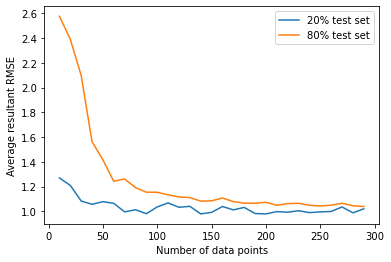

In [252]:
plt.plot(list(range(10,300,10)), y_1_mean, label = '20% test set')
plt.plot(list(range(10,300,10)), y_2_mean, label = '80% test set')
plt.xlabel('Number of data points')
plt.ylabel('Average resultant RMSE')
plt.legend()
plt.show()

The model based on the small test set has consistently lower measured error. The model based on the large test set needs many data points to catch up to approximate equality

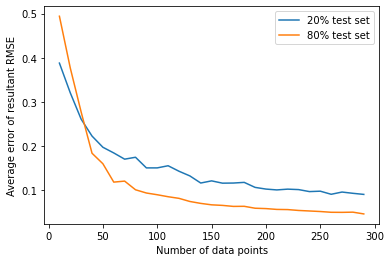

In [253]:
plt.plot(list(range(10,300,10)), y_1_error, label = '20% test set')
plt.plot(list(range(10,300,10)), y_2_error, label = '80% test set')
plt.xlabel('Number of data points')
plt.ylabel('Average error of resultant RMSE')
plt.legend()
plt.show()

On this metric, the larger test set model does overcome the smaller test set model. This is probably because for the small test set model, the bagging error will be heavily dependent on which particular data points end up in the test set. If they have low natural error ($\epsilon$), the overall error will be low, and if they have high natural error ($\epsilon$), it will be high. The difference between the two causes relatively high variance. On the other hand, the large test set will not look much different every time it is drawn, and the error will remain similar. 